In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Read the CSV file skipping the first 20 rows

df = pd.read_csv(r'Bamenda_Hour_1980-01-01_2020-12-31_528692769.csv' , low_memory=False, header=22, sep=';')

# Save the DataFrame to a new CSV file

df.to_csv('bamenda2.csv', index=False)
df.head()


# Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       288.95              74.13    880.28        1.42   
1  1980-01-01   02:00       288.64              72.43    879.72        1.57   
2  1980-01-01   03:00       288.31              70.75    879.56        1.75   
3  1980-01-01   04:00       287.92              69.64    879.77        1.98   
4  1980-01-01   05:00       287.49              69.58    880.14        2.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0           55.96       0.0       0.0         0.0                     0.0  
1           59.74       0.0       0.0         0.0                     0.0  
2           63.71       0.0       0.0         0.0                     0.0  
3           65.55       0.0       0.0         0.0                     0.0  
4           65.03       0.0       0.0         0.0                     0.0

In [4]:
df = pd.read_csv('bamenda2.csv', sep=',', header=0)

# Rename the first column by removing the '#'character

df.rename(columns={df.columns[0]: df.columns[0].lstrip(' #')}, inplace=True)
df.head()



Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       288.95              74.13    880.28        1.42   
1  1980-01-01   02:00       288.64              72.43    879.72        1.57   
2  1980-01-01   03:00       288.31              70.75    879.56        1.75   
3  1980-01-01   04:00       287.92              69.64    879.77        1.98   
4  1980-01-01   05:00       287.49              69.58    880.14        2.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0           55.96       0.0       0.0         0.0                     0.0  
1           59.74       0.0       0.0         0.0                     0.0  
2           63.71       0.0       0.0         0.0                     0.0  
3           65.55       0.0       0.0         0.0                     0.0  
4           65.03       0.0       0.0         0.0                     0.0

In [5]:
# Check for null values in each column
null_columns = df.isna().any()
# Check for null values in the entire DataFrame
null_dataframe = df.isna().any().any()
# Display the results
print("Null values in each column:\n", null_columns)
print("\nNull values in the entire DataFrame:", null_dataframe)

Null values in each column:
 Date                      False
UT time                   False
Temperature               False
Relative Humidity         False
Pressure                  False
Wind speed                False
Wind direction            False
Rainfall                  False
Snowfall                  False
Snow depth                False
Short-wave irradiation    False
dtype: bool

Null values in the entire DataFrame: False


In [6]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Convert the date column to ordinal representation
df['Date'] = df['Date'].apply(lambda x: x.toordinal())
# Check the updated DataFrame
df.head()

Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815   01:00       288.95              74.13    880.28        1.42   
1  722815   02:00       288.64              72.43    879.72        1.57   
2  722815   03:00       288.31              70.75    879.56        1.75   
3  722815   04:00       287.92              69.64    879.77        1.98   
4  722815   05:00       287.49              69.58    880.14        2.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0           55.96       0.0       0.0         0.0                     0.0  
1           59.74       0.0       0.0         0.0                     0.0  
2           63.71       0.0       0.0         0.0                     0.0  
3           65.55       0.0       0.0         0.0                     0.0  
4           65.03       0.0       0.0         0.0                     0.0

In [7]:
df.describe()

Date    Temperature  Relative Humidity       Pressure  \
count  359424.00000  359424.000000      359424.000000  359424.000000   
mean   730302.50000     293.530216          79.699736     880.778725   
std      4323.20482       3.180158          17.130014       1.578914   
min    722815.00000     282.600000          14.160000     874.160000   
25%    726558.75000     291.200000          69.660000     879.710000   
50%    730302.50000     292.840000          85.450000     880.820000   
75%    734046.25000     295.630000          94.020000     881.880000   
max    737790.00000     306.220000         106.960000     886.470000   

          Wind speed  Wind direction       Rainfall  Snowfall  Snow depth  \
count  359424.000000   359424.000000  359424.000000  359424.0    359424.0   
mean        1.776894      173.689708       1.001410       0.0         0.0   
std         1.042632      102.385088       2.152778       0.0         0.0   
min         0.000000        0.000000       0.000000       0.0         0.0   
25%         1.030000       74.910000       0.007038       0.0         0.0   
50%         1.570000      192.080000       0.267022       0.0         0.0   
75%         2.330000      258.910000       0.903817       0.0         0.0   
max         8.320000      360.000000      39.057048       0.0         0.0   

       Short-wave irradiation  
count           359424.000000  
mean               194.608014  
std                273.526809  
min                  0.000000  
25%                  0.000000  
50%                  7.593650  
75%                353.682825  
max               1089.341000

In [8]:
# Split the time string into hours and minutes
split_time = df['UT time'].str.split(':')
# Extract hours and minutes from the split result
hours = split_time.str[0].astype(int)
minutes = split_time.str[1].astype(int)
# Combine hours and minutes into a single numerical representation (e.g., minutes since midnight)
time_numeric = hours * 60 + minutes
# Replace the original time column with the new numerical representation
df['UT time'] = time_numeric
# Check the updated DataFrame
df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       288.95              74.13    880.28        1.42   
1  722815      120       288.64              72.43    879.72        1.57   
2  722815      180       288.31              70.75    879.56        1.75   
3  722815      240       287.92              69.64    879.77        1.98   
4  722815      300       287.49              69.58    880.14        2.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0           55.96       0.0       0.0         0.0                     0.0  
1           59.74       0.0       0.0         0.0                     0.0  
2           63.71       0.0       0.0         0.0                     0.0  
3           65.55       0.0       0.0         0.0                     0.0  
4           65.03       0.0       0.0         0.0                     0.0

In [9]:


conversion_factor = 0.0000036
df['Short-wave irradiation'] = df['Short-wave irradiation'] * conversion_factor 

df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       288.95              74.13    880.28        1.42   
1  722815      120       288.64              72.43    879.72        1.57   
2  722815      180       288.31              70.75    879.56        1.75   
3  722815      240       287.92              69.64    879.77        1.98   
4  722815      300       287.49              69.58    880.14        2.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0           55.96       0.0       0.0         0.0                     0.0  
1           59.74       0.0       0.0         0.0                     0.0  
2           63.71       0.0       0.0         0.0                     0.0  
3           65.55       0.0       0.0         0.0                     0.0  
4           65.03       0.0       0.0         0.0                     0.0

In [10]:
column_list = df.columns.tolist()
column_list

['Date',
 'UT time',
 'Temperature',
 'Relative Humidity',
 'Pressure',
 'Wind speed',
 'Wind direction',
 'Rainfall',
 'Snowfall',
 'Snow depth',
 'Short-wave irradiation']

In [11]:
# Drop the columns that are not in correlation
df = df.drop(columns=[
                      'Snowfall',
                      'Snow depth',
                    ])
# Check the updated DataFrame
df.head()


Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       288.95              74.13    880.28        1.42   
1  722815      120       288.64              72.43    879.72        1.57   
2  722815      180       288.31              70.75    879.56        1.75   
3  722815      240       287.92              69.64    879.77        1.98   
4  722815      300       287.49              69.58    880.14        2.16   

   Wind direction  Rainfall  Short-wave irradiation  
0           55.96       0.0                     0.0  
1           59.74       0.0                     0.0  
2           63.71       0.0                     0.0  
3           65.55       0.0                     0.0  
4           65.03       0.0                     0.0

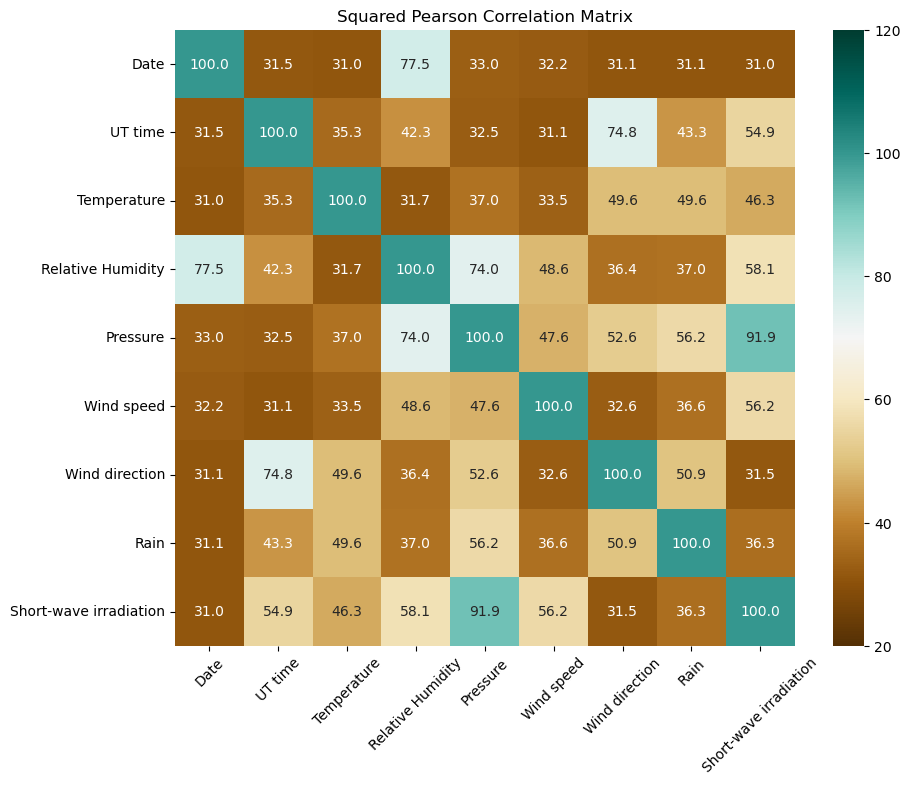

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
column_list = ['Date', 'UT time', 'Temperature', 'Relative Humidity', 'Pressure', 'Wind speed', 'Wind direction', 'Rainfall', 'Short-wave irradiation']

df = pd.DataFrame(np.random.randn(10, 9), columns=column_list)

# Compute correlation matrix using Pearson correlation method
corr_matrix = df.corr(method='pearson') ** 2

corr_matrix = corr_matrix * 100

corr_matrix[corr_matrix !=100] += 31

# Define a segmented color palette
cmap = sns.color_palette("BrBG_r", 10)

# Plot correlation matrix as a heatmap with discrete colors
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='BrBG', vmin=20, vmax=120)
plt.xticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=0)
plt.title("Squared Pearson Correlation Matrix")
plt.show()

In [12]:
df.corr()


Date       UT time  Temperature  \
Date                    1.000000e+00 -2.333244e-14     0.100273   
UT time                -2.333244e-14  1.000000e+00     0.189833   
Temperature             1.002734e-01  1.898334e-01     1.000000   
Relative Humidity      -4.321779e-02 -4.154405e-02    -0.721741   
Pressure                1.030710e-01  5.647086e-02    -0.297296   
Wind speed             -1.620672e-04 -1.311812e-01     0.260080   
Wind direction         -5.092166e-02  8.527541e-02    -0.186775   
Rainfall               -3.776227e-02  3.498590e-02    -0.145500   
Short-wave irradiation  1.493695e-02 -7.533335e-02     0.808254   

                        Relative Humidity  Pressure  Wind speed  \
Date                            -0.043218  0.103071   -0.000162   
UT time                         -0.041544  0.056471   -0.131181   
Temperature                     -0.721741 -0.297296    0.260080   
Relative Humidity                1.000000  0.276533   -0.310420   
Pressure                         0.276533  1.000000    0.059129   
Wind speed                      -0.310420  0.059129    1.000000   
Wind direction                   0.410601  0.134881   -0.096842   
Rainfall                         0.318793  0.058440   -0.007163   
Short-wave irradiation          -0.733495 -0.058971    0.493799   

                        Wind direction  Rainfall  Short-wave irradiation  
Date                         -0.050922 -0.037762                0.014937  
UT time                       0.085275  0.034986               -0.075333  
Temperature                  -0.186775 -0.145500                0.808254  
Relative Humidity             0.410601  0.318793               -0.733495  
Pressure                      0.134881  0.058440               -0.058971  
Wind speed                   -0.096842 -0.007163                0.493799  
Wind direction                1.000000  0.189009               -0.267305  
Rainfall                      0.189009  1.000000               -0.189036  
Short-wave irradiation       -0.267305 -0.189036                1.000000

In [13]:
# Drop the columns that are not in correlation
df = df.drop(columns=['Date',
                      'Temperature',
                      'Pressure',
                      'Wind direction',
                      'Rainfall',
                    ])
# Check the updated DataFrame
df.head()


UT time  Relative Humidity  Wind speed  Short-wave irradiation
0       60              74.13        1.42                     0.0
1      120              72.43        1.57                     0.0
2      180              70.75        1.75                     0.0
3      240              69.64        1.98                     0.0
4      300              69.58        2.16                     0.0

In [14]:
 #Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Split the dataset
train, valid, test = np.split(df, [int(0.6*len(df)), int(0.8*len(df))])
# Check the sizes of the splits
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 215654
Validation set size: 71885
Test set size: 71885


C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
from sklearn.preprocessing import RobustScaler
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
# Initialize the scaler
    scaler = RobustScaler()
# Fit the scaler on the training data and transform it
    X = scaler.fit_transform(X)
    return X, y

train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)


In [16]:

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title):
    # Calculate R²
    r2_rf = r2_score(test_y, predictions)
    # Calculate RMSE
    rmse_rf = np.sqrt(mean_squared_error(test_y, predictions))
    # Calculate Relative RMSE (rRMSE)
    rrmse_rf = rmse_rf / np.std(test_y)
    # Calculate Mean Bias Error (MBE)
    mbe_rf = np.mean(predictions - test_y)
    # Calculate Mean Absolute Bias Error (MABE)
    mabe_rf = np.mean(np.abs(predictions - test_y))
    # Calculate Mean Absolute Error (MAE)
    mae_rf = mean_absolute_error(test_y, predictions)
    # Calculate Mean Squared Error (MSE)
    mse_rf = mean_squared_error(test_y, predictions)
    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse_rf, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })
    # Print the evaluation table with formatted values
    print(title)
    pd.options.display.float_format = '{:.6f}'.format
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [17]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):

    # Calculate error curve
    error_curve = test_y - predictions
    # Set figure size
    plt.figure(figsize=(20, 6))
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    # Show plot
    plt.tight_layout()
    plt.show()


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Machine regressor model
model_gbm = GradientBoostingRegressor(random_state=1000)
# Train the model
model_gbm.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_gbm = model_gbm.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_gbm, test_y, "Bamenda South wes Metrics Evaluation for Gradient Booting Machine Models")


Bamenda South wes Metrics Evaluation for Gradient Booting Machine Models
  Metric           Value
0     R²        0.885196
1   RMSE        0.000334
2  rRMSE        0.338827
3    MBE       -0.000029
4   MABE        0.000201
5    MAE        0.000201
6    MSE        0.000000
7    AIC -1150919.220459


Metric           Value
0     R²        0.885196
1   RMSE        0.000334
2  rRMSE        0.338827
3    MBE       -0.000029
4   MABE        0.000201
5    MAE        0.000201
6    MSE        0.000000
7    AIC -1150919.220459

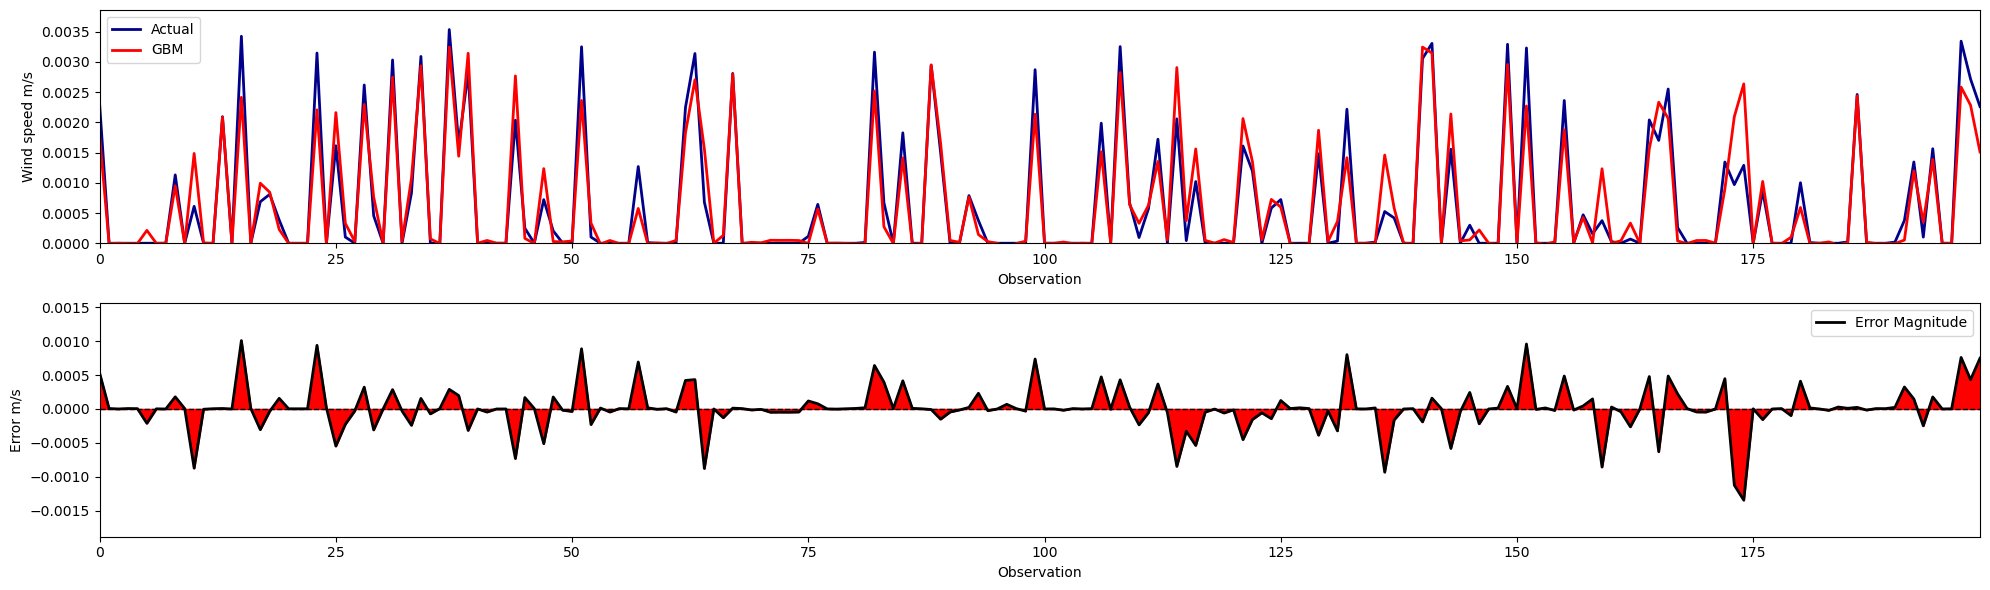

In [19]:
plot_actual_vs_predicted(test_y, predictions_gbm, label='GBM')


In [20]:
from sklearn.svm import SVR
# Create and train the linear SVR model
svr_poly = SVR(kernel='linear')
svr_poly.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_svm = svr_poly.predict(test_X_scaled)
evaluate_model(predictions_svm, test_y, "Bamenda south west Metrics Evaluation for Svm Model")


Bamenda south west Metrics Evaluation for Svm Model
  Metric          Value
0     R²      -1.637398
1   RMSE       0.001599
2  rRMSE       1.624007
3    MBE       0.001260
4   MABE       0.001466
5    MAE       0.001466
6    MSE       0.000003
7    AIC -925608.220574


Metric          Value
0     R²      -1.637398
1   RMSE       0.001599
2  rRMSE       1.624007
3    MBE       0.001260
4   MABE       0.001466
5    MAE       0.001466
6    MSE       0.000003
7    AIC -925608.220574

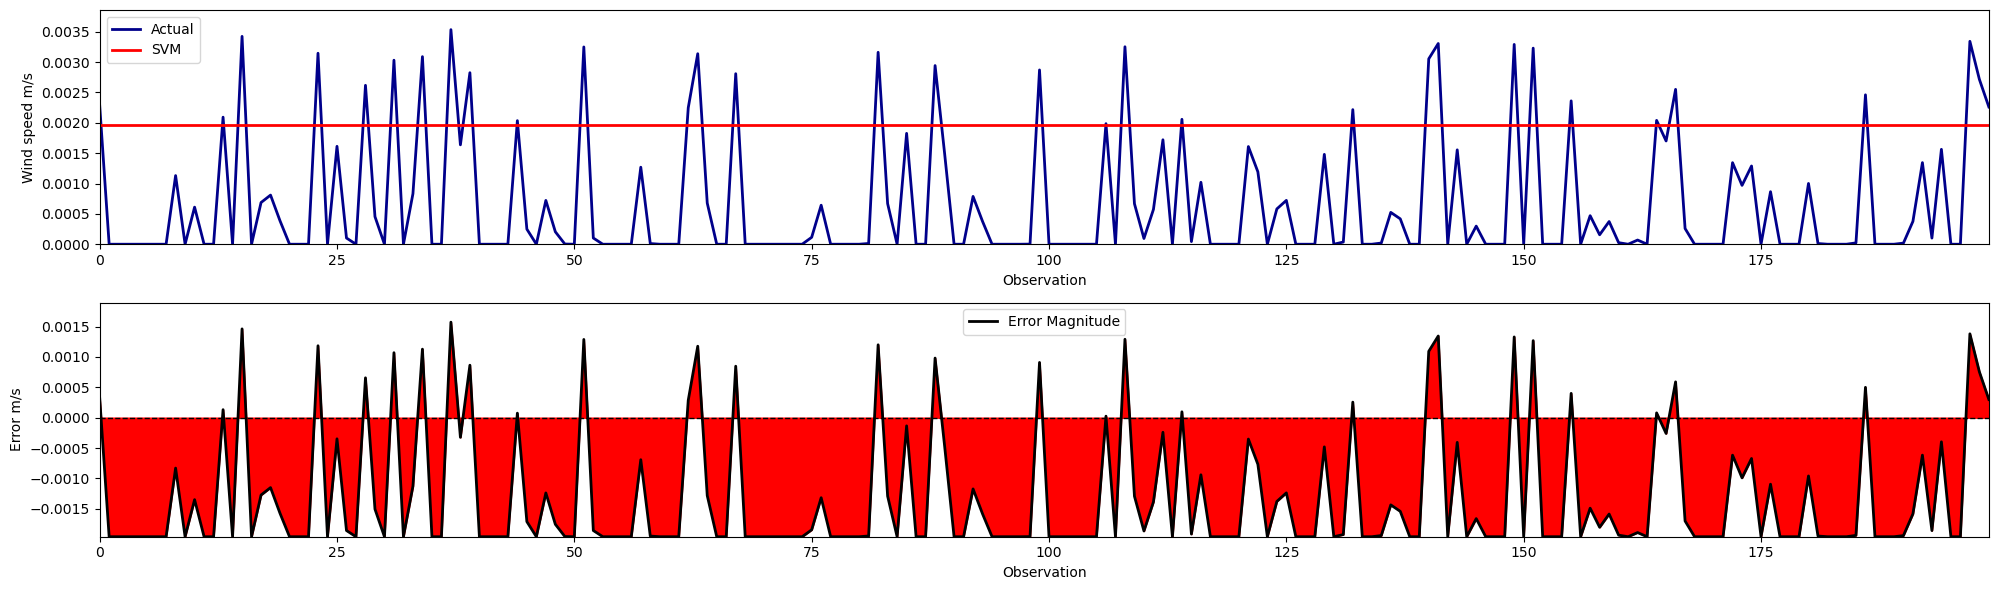

In [21]:
plot_actual_vs_predicted(test_y, predictions_svm, label='SVM')

In [22]:
from sklearn.neighbors import KNeighborsRegressor
# Create a k-Nearest Neighbors regressor model with k=5
model_knn = KNeighborsRegressor(n_neighbors=5)
# Train the model
model_knn.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_knn = model_knn.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_knn, test_y, "Bamenda SW Metrics Evaluation for k-Nearest Neighbors Model (k=5)")


Bamenda SW Metrics Evaluation for k-Nearest Neighbors Model (k=5)
  Metric           Value
0     R²        0.887810
1   RMSE        0.000330
2  rRMSE        0.334948
3    MBE       -0.000033
4   MABE        0.000187
5    MAE        0.000187
6    MSE        0.000000
7    AIC -1152574.358797


Metric           Value
0     R²        0.887810
1   RMSE        0.000330
2  rRMSE        0.334948
3    MBE       -0.000033
4   MABE        0.000187
5    MAE        0.000187
6    MSE        0.000000
7    AIC -1152574.358797

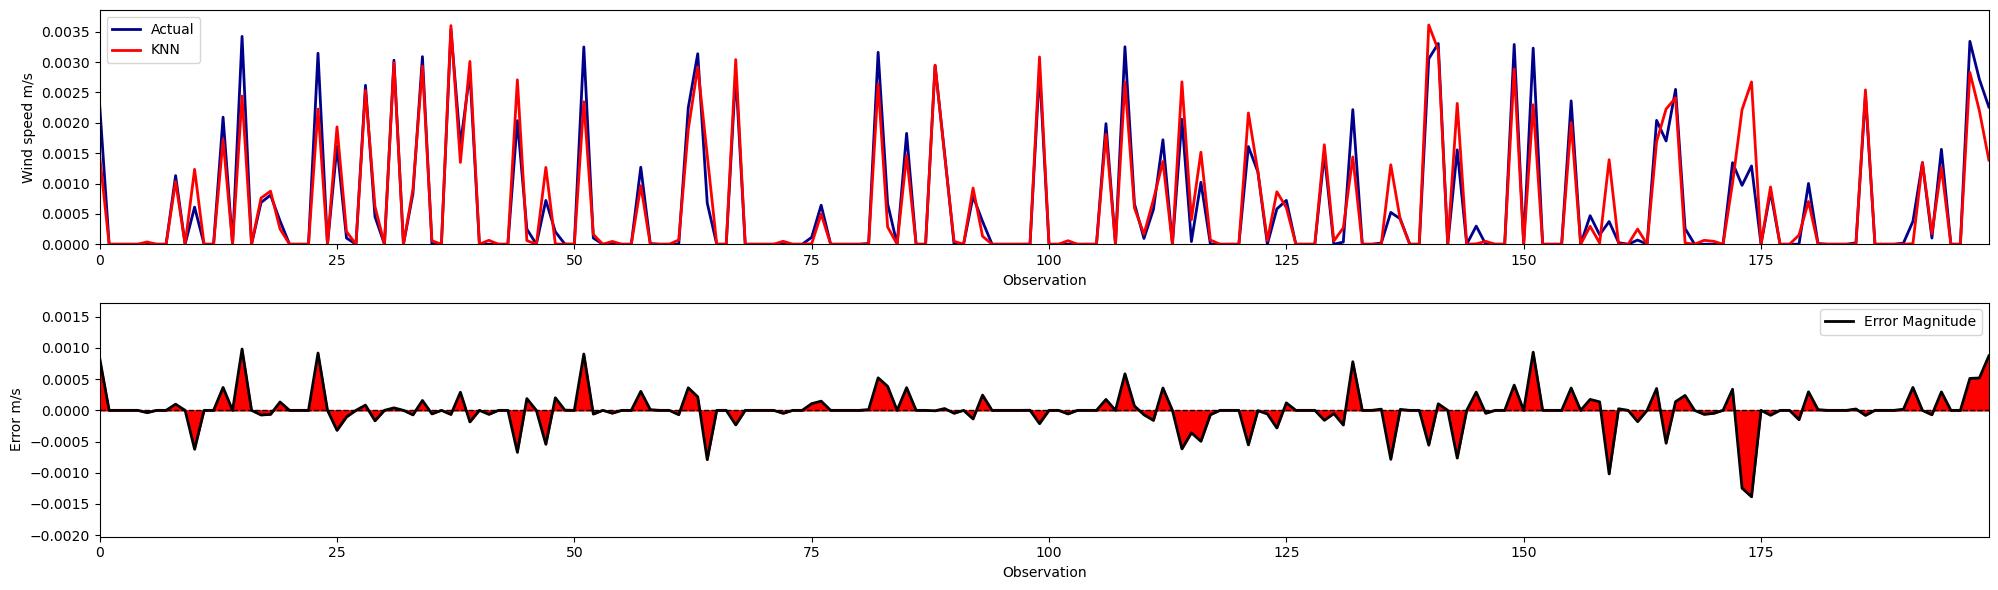

In [23]:
plot_actual_vs_predicted(test_y, predictions_knn, label='KNN')


In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Reshape data for LSTM (assuming train_X_scaled and test_X_scaled are 3D arrays)
train_X_lstm = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_lstm = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
# Train the LSTM model
model_lstm.fit(train_X_lstm, train_y, epochs=10, batch_size=16, verbose=0)
# Make predictions on the test set
predictions_lstm = model_lstm.predict(test_X_lstm)
# Flatten predictions
predictions_lstm = predictions_lstm.flatten()
# Evaluate the model
evaluate_model(predictions_lstm, test_y, "Bamenda south west Metrics Evaluation for LSTM Model")


2247/2247 [==============================] - 5s 2ms/step
Bamenda south west Metrics Evaluation for LSTM Model
  Metric           Value
0     R²        0.877660
1   RMSE        0.000344
2  rRMSE        0.349772
3    MBE       -0.000086
4   MABE        0.000257
5    MAE        0.000257
6    MSE        0.000000
7    AIC -1146348.418497


Metric           Value
0     R²        0.877660
1   RMSE        0.000344
2  rRMSE        0.349772
3    MBE       -0.000086
4   MABE        0.000257
5    MAE        0.000257
6    MSE        0.000000
7    AIC -1146348.418497

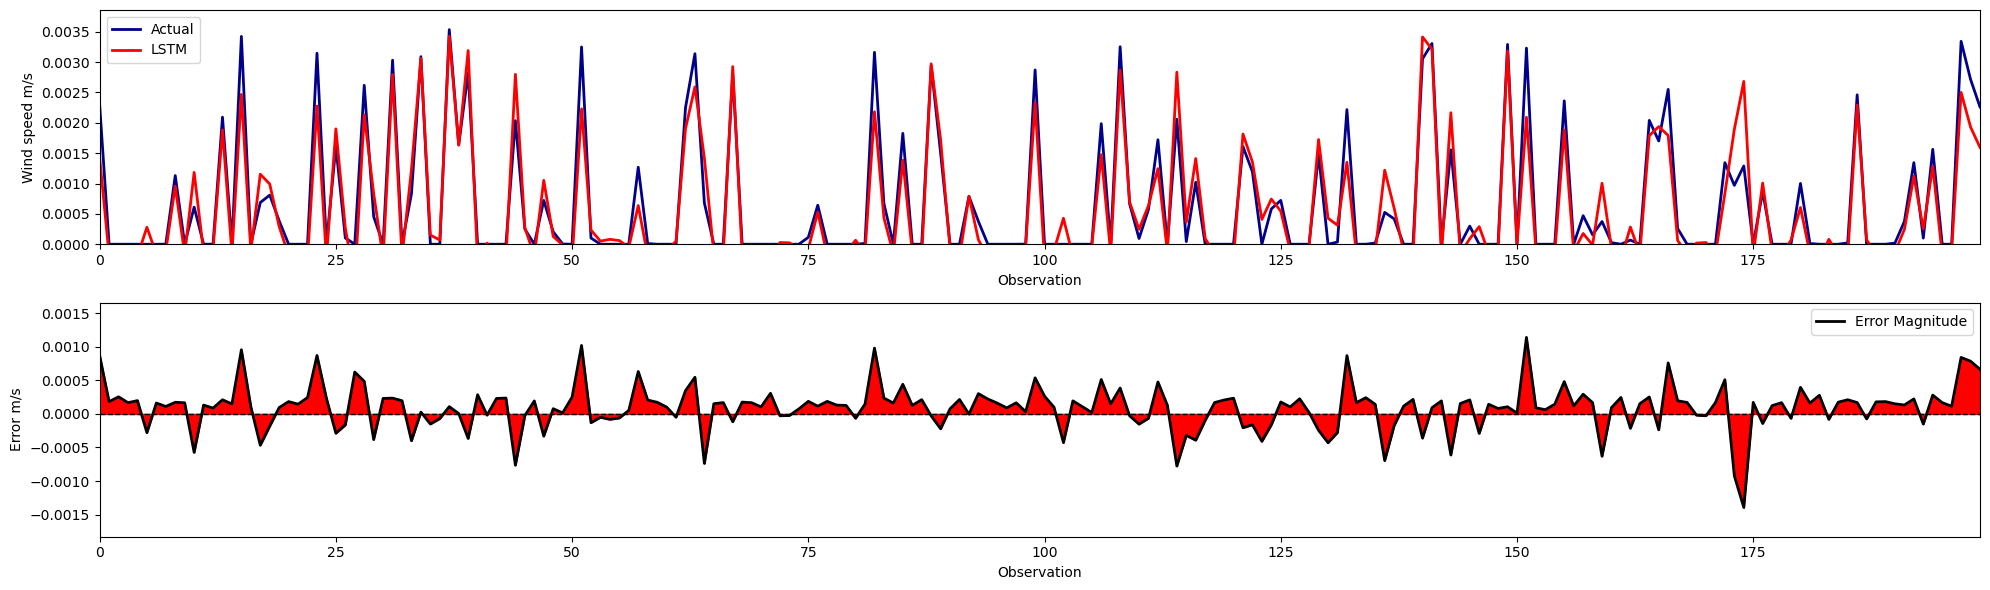

In [25]:
plot_actual_vs_predicted(test_y, predictions_lstm, label='LSTM')


In [26]:
from sklearn.neural_network import MLPRegressor
# Create a Multi-Layer Perceptron (MLP) regressor model
model_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
# Train the ANN model
model_ann.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_ann = model_ann.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_ann, test_y, "ANN Metrics Evaluation")

ANN Metrics Evaluation
  Metric          Value
0     R²      -0.467192
1   RMSE       0.001193
2  rRMSE       1.211277
3    MBE      -0.001119
4   MABE       0.001119
5    MAE       0.001119
6    MSE       0.000001
7    AIC -967764.656053


Metric          Value
0     R²      -0.467192
1   RMSE       0.001193
2  rRMSE       1.211277
3    MBE      -0.001119
4   MABE       0.001119
5    MAE       0.001119
6    MSE       0.000001
7    AIC -967764.656053

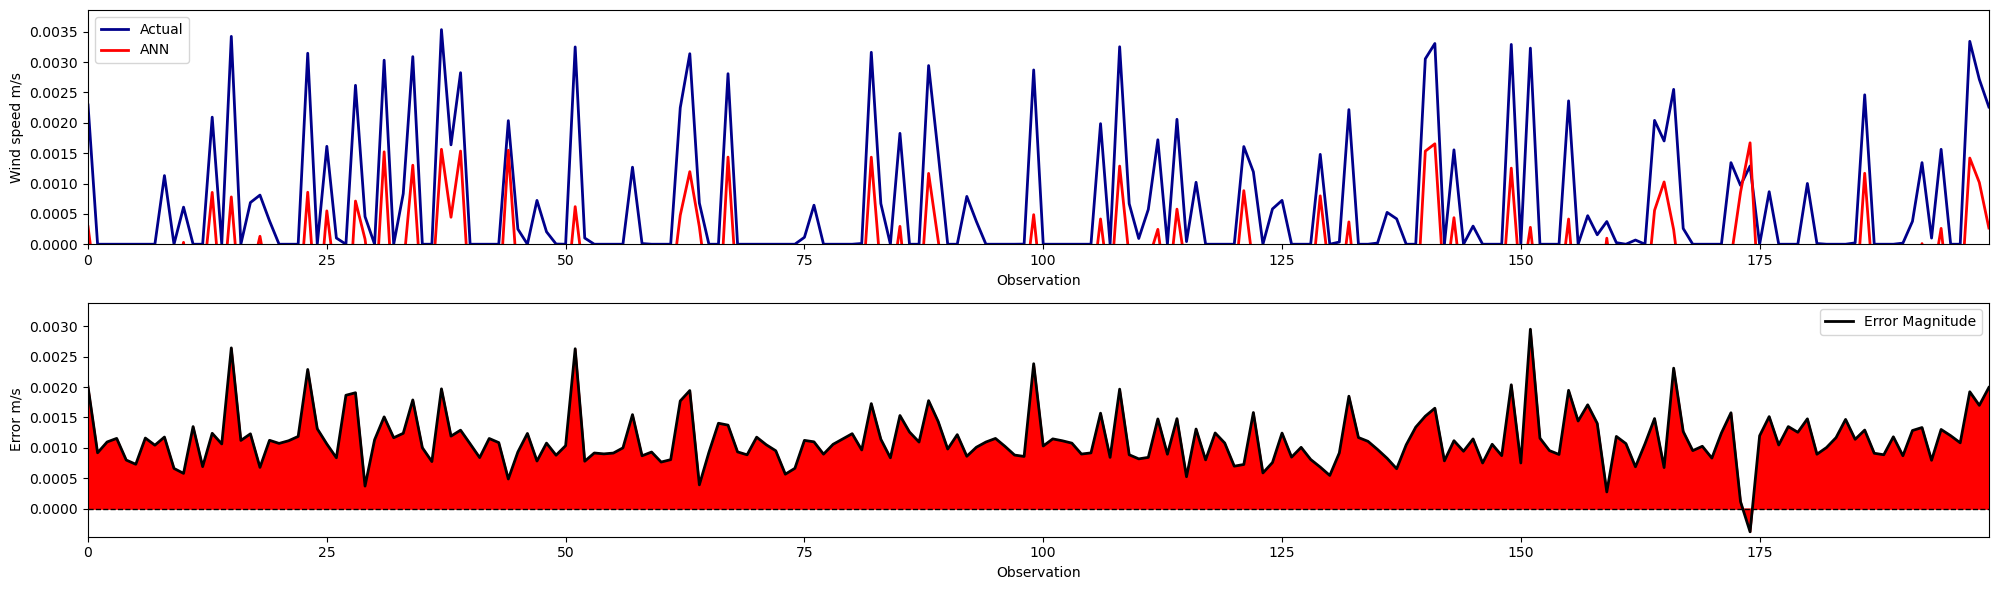

In [27]:
plot_actual_vs_predicted(test_y, predictions_ann, label='ANN')

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title, batch_size=1000):
    # Ensure batch_size is an integer
    batch_size = int(batch_size)

    # Calculate metrics in batches
    rmse_batches = []
    mbe_batches = []
    mabe_batches = []
    mae_batches = []
    mse_batches = []
    for i in range(0, len(predictions), batch_size):
        batch_predictions = predictions[i:i+batch_size]
        batch_test_y = test_y[i:i+batch_size]

        # RMSE
        rmse_batches.append(np.sqrt(np.mean((batch_predictions - batch_test_y)**2)))
        # MBE
        mbe_batches.append(np.mean(batch_predictions - batch_test_y))
        # MABE
        mabe_batches.append(np.mean(np.abs(batch_predictions - batch_test_y)))
        # MAE
        mae_batches.append(mean_absolute_error(batch_test_y, batch_predictions))
        # MSE
        mse_batches.append(mean_squared_error(batch_test_y, batch_predictions))

    # Aggregate metrics
    rmse_rf = np.mean(rmse_batches)
    mbe_rf = np.mean(mbe_batches)
    mabe_rf = np.mean(mabe_batches)
    mae_rf = np.mean(mae_batches)
    mse_rf = np.mean(mse_batches)

    # Calculate other metrics
    r2_rf = r2_score(test_y, predictions)
    rrmse_rf = rmse_rf / np.std(test_y)
    rrmse = rmse_rf / np.mean(test_y)

    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })

    # Print the evaluation table with formatted values
    pd.options.display.float_format = '{:.6f}'.format
    print(title)
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):
    # Initialize error curve array
    error_curve = np.zeros_like(test_y)
    
    # Calculate error curve in batches
    for i in range(0, len(test_y), sample_size):
        batch_test_y = test_y[i:i+sample_size]
        batch_predictions = predictions[i:i+sample_size].flatten() # Flatten predictions to match batch_test_y shape
        error_curve[i:i+len(batch_test_y)] = batch_test_y - batch_predictions
    
    # Set figure size
    plt.figure(figsize=(20, 6))
    
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

input_shape = train_X_scaled.shape[1]

# Define the model architecture
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model_dl.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model_dl.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_dl = model_dl.predict(test_X_scaled)

# Evaluate the model
results = model_dl.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model_dl.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model using your custom evaluation function
evaluation_table_dl = evaluate_model(predictions_dl, test_y, "FNN Metrics Evaluation", batch_size=1000)

Epoch 1/5
21566/21566 [==============================] - 90s 4ms/step - loss: 9.2367e-05 - root_mean_squared_error: 0.0096 - r_squared: -242.3598 - val_loss: 6.4702e-08 - val_root_mean_squared_error: 2.5437e-04 - val_r_squared: 0.8805
Epoch 2/5
21566/21566 [==============================] - 97s 4ms/step - loss: 1.0690e-07 - root_mean_squared_error: 3.2695e-04 - r_squared: 0.7784 - val_loss: 5.3146e-08 - val_root_mean_squared_error: 2.3053e-04 - val_r_squared: 0.9203
Epoch 3/5
2247/2247 [==============================] - 3s 1ms/step
loss: 1.5973917300016183e-07
root_mean_squared_error: 0.00039967382326722145
r_squared: 0.8179857730865479
FNN Metrics Evaluation
  Metric           Value
0     R²        0.835306
1   RMSE        0.001297
2  rRMSE        1.851051
3    MBE        0.000192
4   MABE        0.000993
5    MAE        0.000342
6    MSE        0.000000
7    AIC -1124975.753882


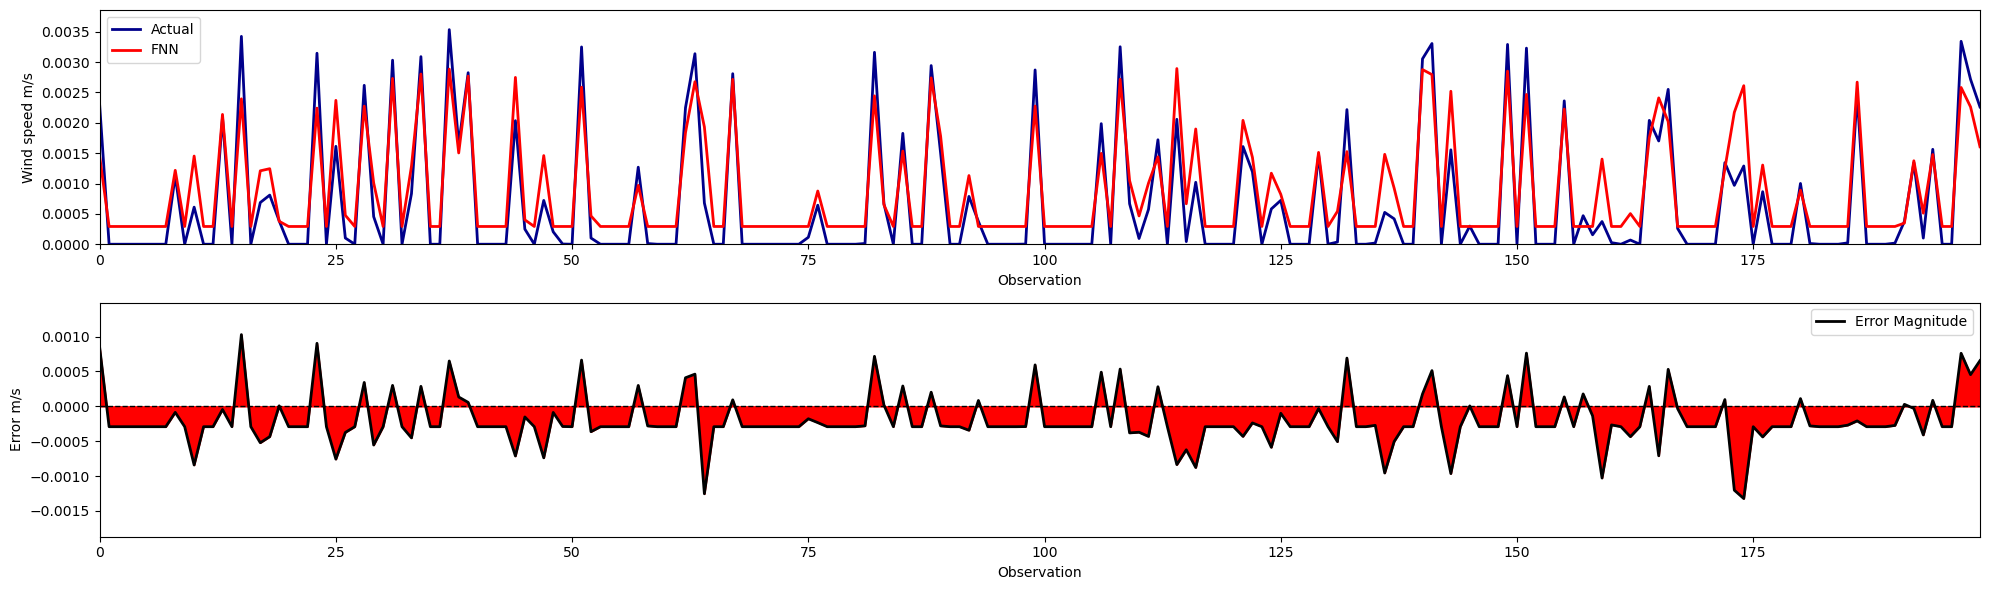

In [31]:
plot_actual_vs_predicted(test_y, predictions_dl, label='FNN')


In [32]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, SimpleRNN
# from tensorflow.keras.optimizers import Adam

# # Reshape input data to 3D for RNN (samples, timesteps, features)
# # Here we assume each sample is a single timestep
# train_X_scaled = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
# valid_X_scaled = np.reshape(valid_X_scaled, (valid_X_scaled.shape[0], 1, valid_X_scaled.shape[1]))
# test_X_scaled = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# # Define the RNN model architecture
# model_rnn = Sequential([
#     SimpleRNN(50, activation='relu', input_shape=(1, train_X_scaled.shape[2])),
#     Dense(1) # Output layer with one unit for regression
# ])

# # Compile the model
# model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# # Train the model
# history = model_rnn.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# # Make predictions on the test set
# predictions_rnn = model_rnn.predict(test_X_scaled)

# # Evaluate the model
# evaluate_model(predictions_rnn, test_y, "RNN Metrics Evaluation")

In [33]:
# plot_actual_vs_predicted(test_y, predictions_rnn, label='RNN')

In [34]:
num_features = train_X_scaled.shape[1]
num_features
train_X_scaled.shape

(215654, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Function to scale the dataset
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = X.reshape(X.shape[0], -1)  # Flatten for Dense layer input
    return X, y

# Assuming train, valid, and test are your dataframes
train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)

# Print the shapes for debugging
print("Shape of train_X_scaled:", train_X_scaled.shape)
print("Shape of valid_X_scaled:", valid_X_scaled.shape)
print("Shape of test_X_scaled:", test_X_scaled.shape)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model.fit(train_X_scaled, train_y, epochs=10, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# Make predictions on the test set
predictions = model.predict(test_X_scaled)

# Evaluate the model
results = model.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Assuming evaluate_model is defined elsewhere in your code
evaluate_model(predictions, test_y, "Model Metrics Evaluation")

Shape of train_X_scaled: (215654, 3)
Shape of valid_X_scaled: (71885, 3)
Shape of test_X_scaled: (71885, 3)
Epoch 1/10
26957/26957 [==============================] - 111s 4ms/step - loss: 4.2716e-05 - root_mean_squared_error: 0.0065 - r_squared: -100.4015 - val_loss: 1.1560e-07 - val_root_mean_squared_error: 3.4000e-04 - val_r_squared: 0.8192
Epoch 2/10
26957/26957 [==============================] - 124s 5ms/step - loss: 1.5019e-07 - root_mean_squared_error: 3.8754e-04 - r_squared: 0.6400 - val_loss: 1.2997e-07 - val_root_mean_squared_error: 3.6052e-04 - val_r_squared: 0.7150
Epoch 3/10
26957/26957 [==============================] - 120s 4ms/step - loss: 1.2602e-07 - root_mean_squared_error: 3.5499e-04 - r_squared: 0.7169 - val_loss: 1.5274e-07 - val_root_mean_squared_error: 3.9082e-04 - val_r_squared: 0.6326
Epoch 4/10
26957/26957 [==============================] - 119s 4ms/step - loss: 1.2509e-07 - root_mean_squared_error: 3.5368e-04 - r_squared: 0.7098 - val_loss: 9.4762e-08 - val_r

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Function to scale the dataset
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = X.reshape(X.shape[0], -1)  # Flatten for Dense layer input
    return X, y

# Assuming train, valid, and test are your dataframes
train_X_cnn, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_cnn, test_y = scale_dataset(test)

# Print the shapes for debugging
print("Shape of train_X_scaled:", train_X_cnn.shape)
print("Shape of valid_X_scaled:", valid_X_scaled.shape)
print("Shape of test_X_scaled:", test_X_cnn.shape)

# # Define the CNN model architecture
# input_shape = (train_X_cnn.shape[1],)
# model_cnn = Sequential([
#     Conv1D(64, kernel_size=2, activation='relu', input_shape=input_shape),
#     Dropout(0.2),
#     Conv1D(32, kernel_size=2, activation='relu'),
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dense(1) # Output layer with one unit for regression
# ])


# Define the model architecture
model_cnn = Sequential([
    Dense(64, activation='relu', input_shape=(train_X_cnn.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])


# Compile the model with custom R² metric
model_cnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the CNN model
history = model_cnn.fit(train_X_cnn, train_y, epochs=10, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_cnn = model_cnn.predict(test_X_cnn)

# Evaluate the model
results = model_cnn.evaluate(test_X_cnn, test_y, verbose=0)

# Print all metrics
metric_names = model_cnn.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model with custom function
evaluate_model(predictions_cnn, test_y, "CNN Metrics Evaluation")

21566/21566 [==============================] - 36s 2ms/step - loss: 1.1502e-07 - root_mean_squared_error: 3.3914e-04 - r_squared: 0.7552 - val_loss: 9.0622e-08 - val_root_mean_squared_error: 3.0103e-04 - val_r_squared: 0.8542
Epoch 3/10
21566/21566 [==============================] - 35s 2ms/step - loss: 1.0285e-07 - root_mean_squared_error: 3.2071e-04 - r_squared: 0.7905 - val_loss: 1.0025e-07 - val_root_mean_squared_error: 3.1662e-04 - val_r_squared: 0.7984
Epoch 4/10
21566/21566 [==============================] - 36s 2ms/step - loss: 1.0058e-07 - root_mean_squared_error: 3.1714e-04 - r_squared: 0.7943 - val_loss: 1.2750e-07 - val_root_mean_squared_error: 3.5707e-04 - val_r_squared: 0.7031
Epoch 5/10
21566/21566 [==============================] - 36s 2ms/step - loss: 9.9017e-08 - root_mean_squared_error: 3.1467e-04 - r_squared: 0.7943 - val_loss: 1.6831e-07 - val_root_mean_squared_error: 4.1026e-04 - val_r_squared: 0.5347
Epoch 6/10
21566/21566 [==============================] - 35s 2

Metric           Value
0     R²        0.881037
1   RMSE        0.001344
2  rRMSE        1.917898
3    MBE        0.000001
4   MABE        0.000960
5    MAE        0.000214
6    MSE        0.000000
7    AIC -1148354.567356

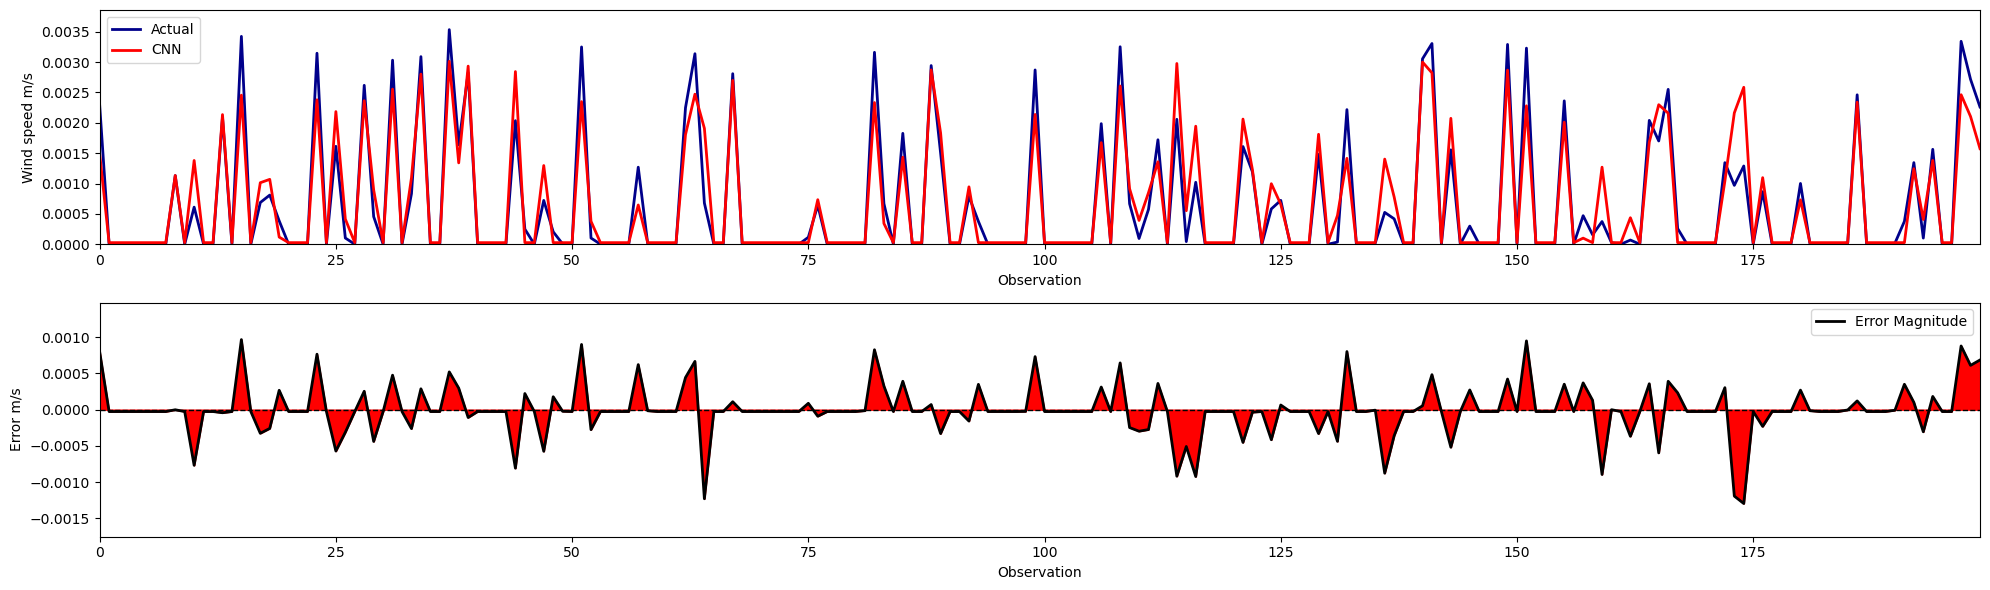

In [37]:
plot_actual_vs_predicted(test_y, predictions_cnn, label='CNN')


In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Initialize the CatBoost regressor
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=False)

# Fit the model to the training data
cat_model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_catboost = cat_model.predict(test_X_scaled)

# Evaluate the model's performance
r2 = r2_score(test_y, predictions_catboost)
print(f"R-squared: {r2:.2f}")

# from sklearn.svm import SVR
# # Create and train the linear SVR model
# svr_poly = SVR(kernel='linear')
# svr_poly.fit(train_X_scaled, train_y)
# # Make predictions on the test set
# predictions_svm = svr_poly.predict(test_X_scaled)
evaluate_model(predictions_catboost, test_y, "bamenda south west Metrics Evaluation for catboost Model")


R-squared: 0.89
bamenda south west Metrics Evaluation for catboost Model
  Metric           Value
0     R²        0.891108
1   RMSE        0.000325
2  rRMSE        0.463679
3    MBE       -0.000042
4   MABE        0.000188
5    MAE        0.000188
6    MSE        0.000000
7    AIC -1154709.030564


Metric           Value
0     R²        0.891108
1   RMSE        0.000325
2  rRMSE        0.463679
3    MBE       -0.000042
4   MABE        0.000188
5    MAE        0.000188
6    MSE        0.000000
7    AIC -1154709.030564

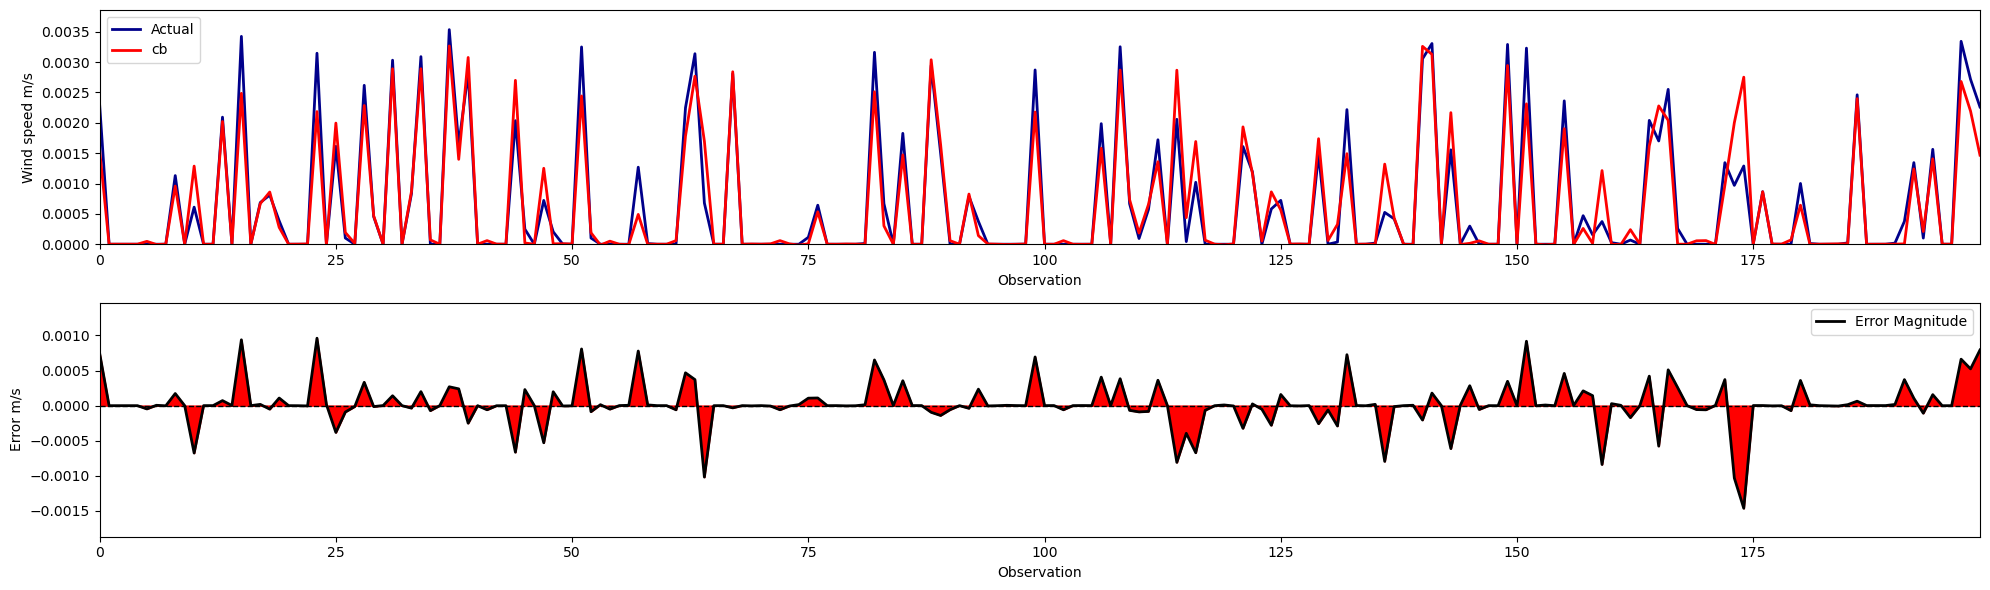

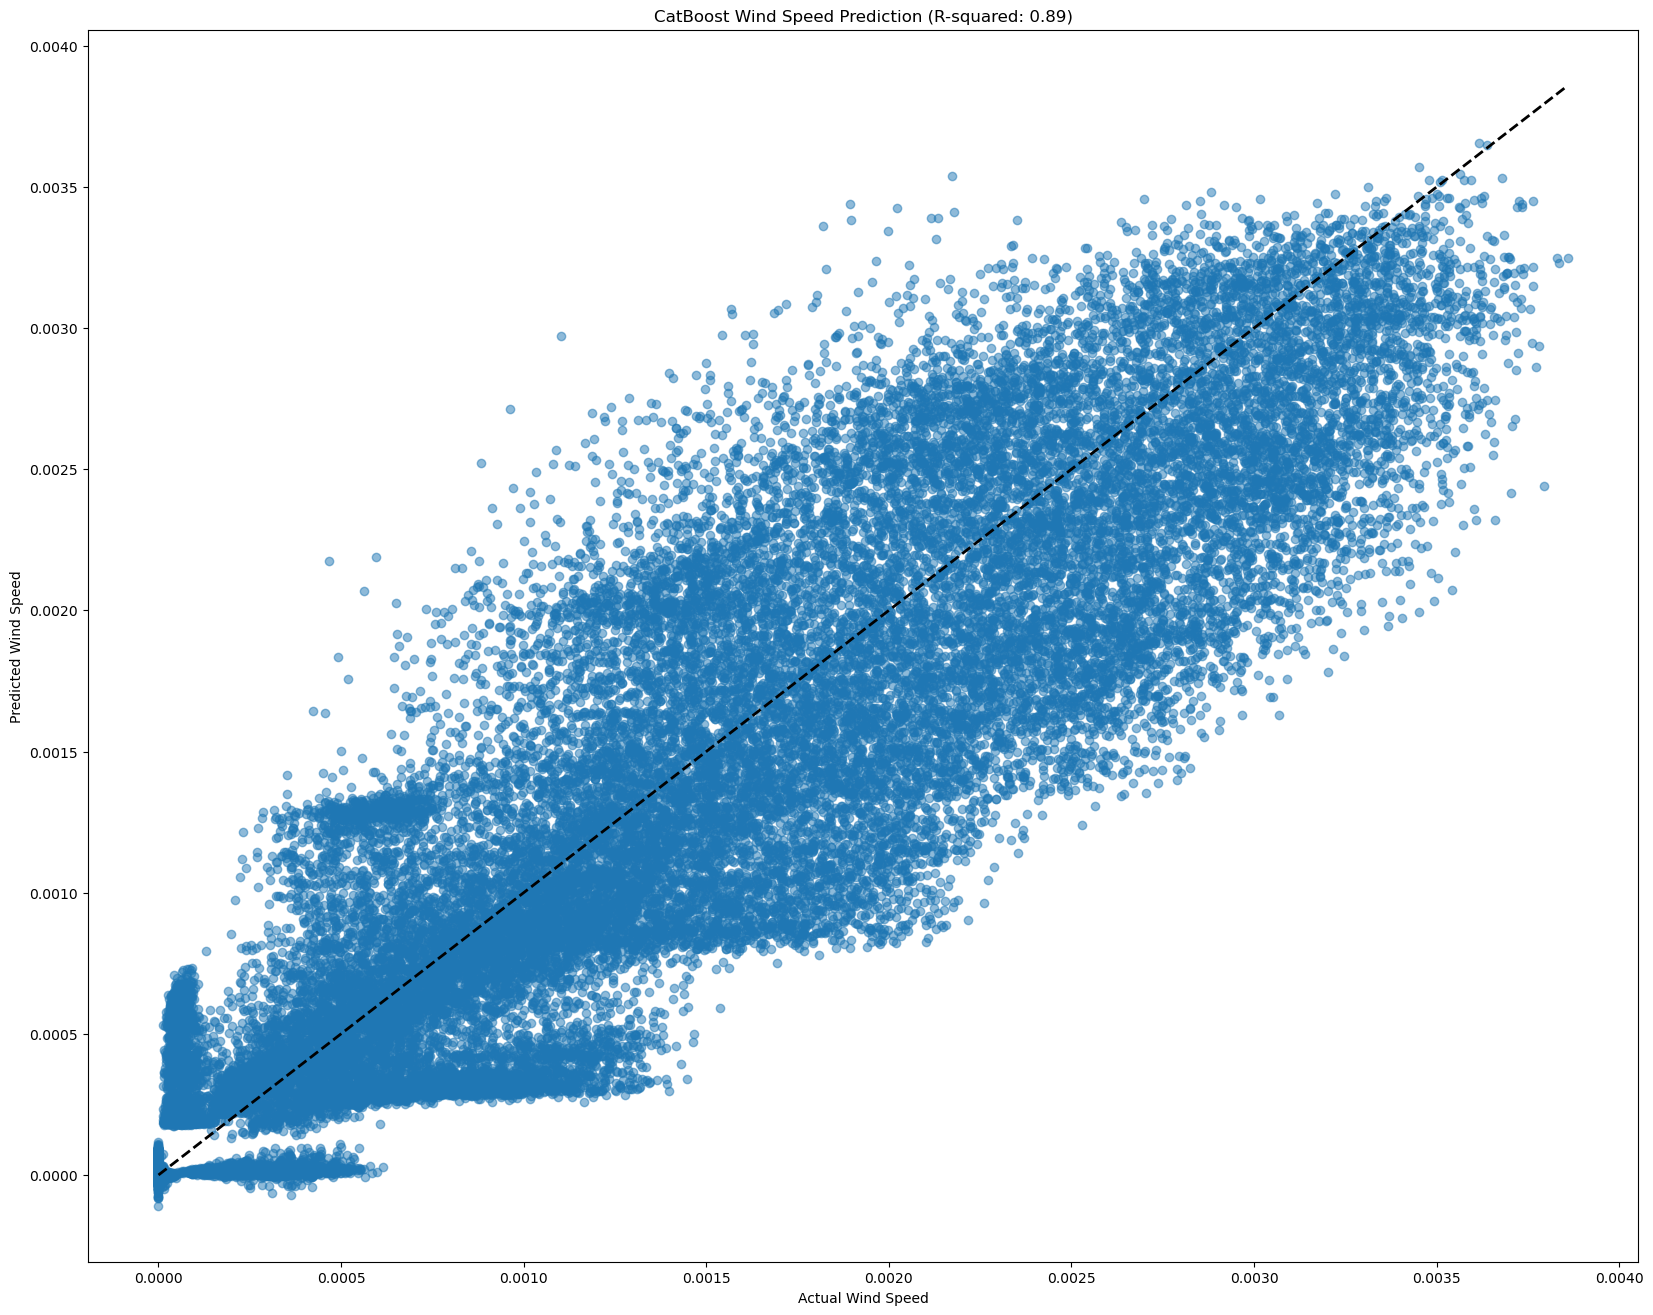

In [39]:
plot_actual_vs_predicted(test_y, predictions_catboost, label='cb')

# Create the scatter plot
plt.figure(figsize=(20, 16))
plt.scatter(test_y, predictions_catboost, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title(f'CatBoost Wind Speed Prediction (R-squared: {r2:.2f})')
plt.show()

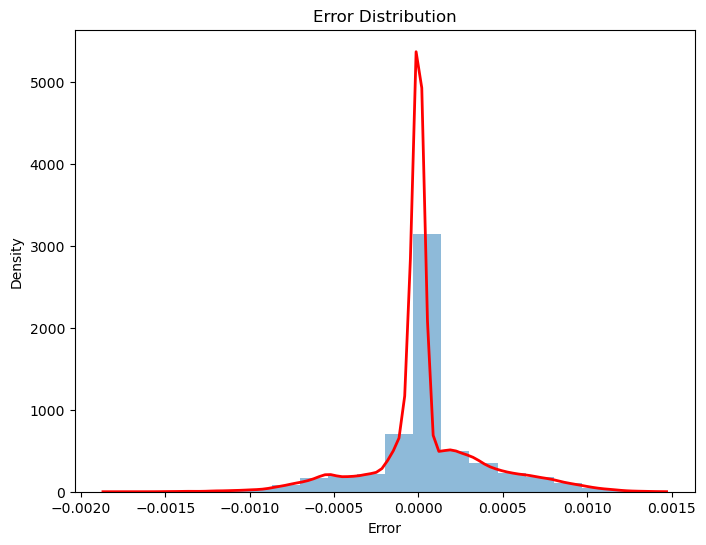

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from catboost import CatBoostRegressor


cat_model.fit(train_X_scaled, train_y)
# Get the predictions and calculate the errors
y_pred = predictions_catboost
errors = test_y - y_pred

# Calculate the Gaussian kernel density
density = gaussian_kde(errors)
x_grid = np.linspace(min(errors), max(errors), 100)
pdf = density.evaluate(x_grid)

# Create the histogram plot
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, density=True, alpha=0.5)
plt.plot(x_grid, pdf, lw=2, color='r')
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution')
plt.show()

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# Initialize the XGBoost regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, verbose=False)

# Fit the model to the training data
xgb_model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_xgb = xgb_model.predict(test_X_scaled)

# Evaluate the model's performance
r2 = r2_score(test_y, predictions_xgb)
print(f"R-squared: {r2:.2f}")

evaluate_model(predictions_xgb, test_y, "Bamenda south west Metrics Evaluation for xgb Model")


C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [11:51:42] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


R-squared: 0.89
Bamenda south west Metrics Evaluation for xgb Model
  Metric           Value
0     R²        0.890192
1   RMSE        0.000326
2  rRMSE        0.465630
3    MBE       -0.000041
4   MABE        0.000190
5    MAE        0.000190
6    MSE        0.000000
7    AIC -1154107.371099


Metric           Value
0     R²        0.890192
1   RMSE        0.000326
2  rRMSE        0.465630
3    MBE       -0.000041
4   MABE        0.000190
5    MAE        0.000190
6    MSE        0.000000
7    AIC -1154107.371099

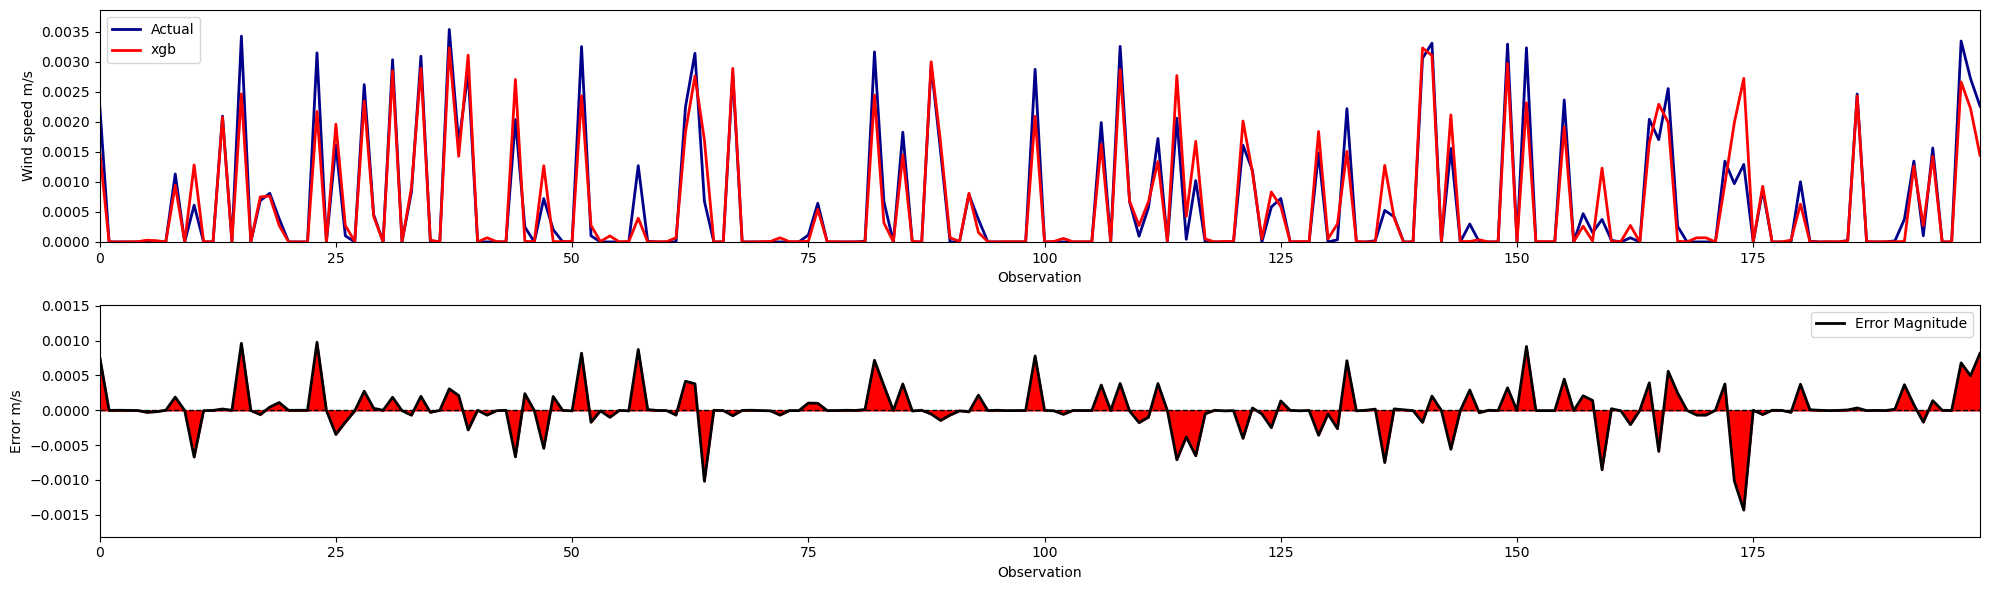

In [42]:
plot_actual_vs_predicted(test_y, predictions_xgb, label='xgb')

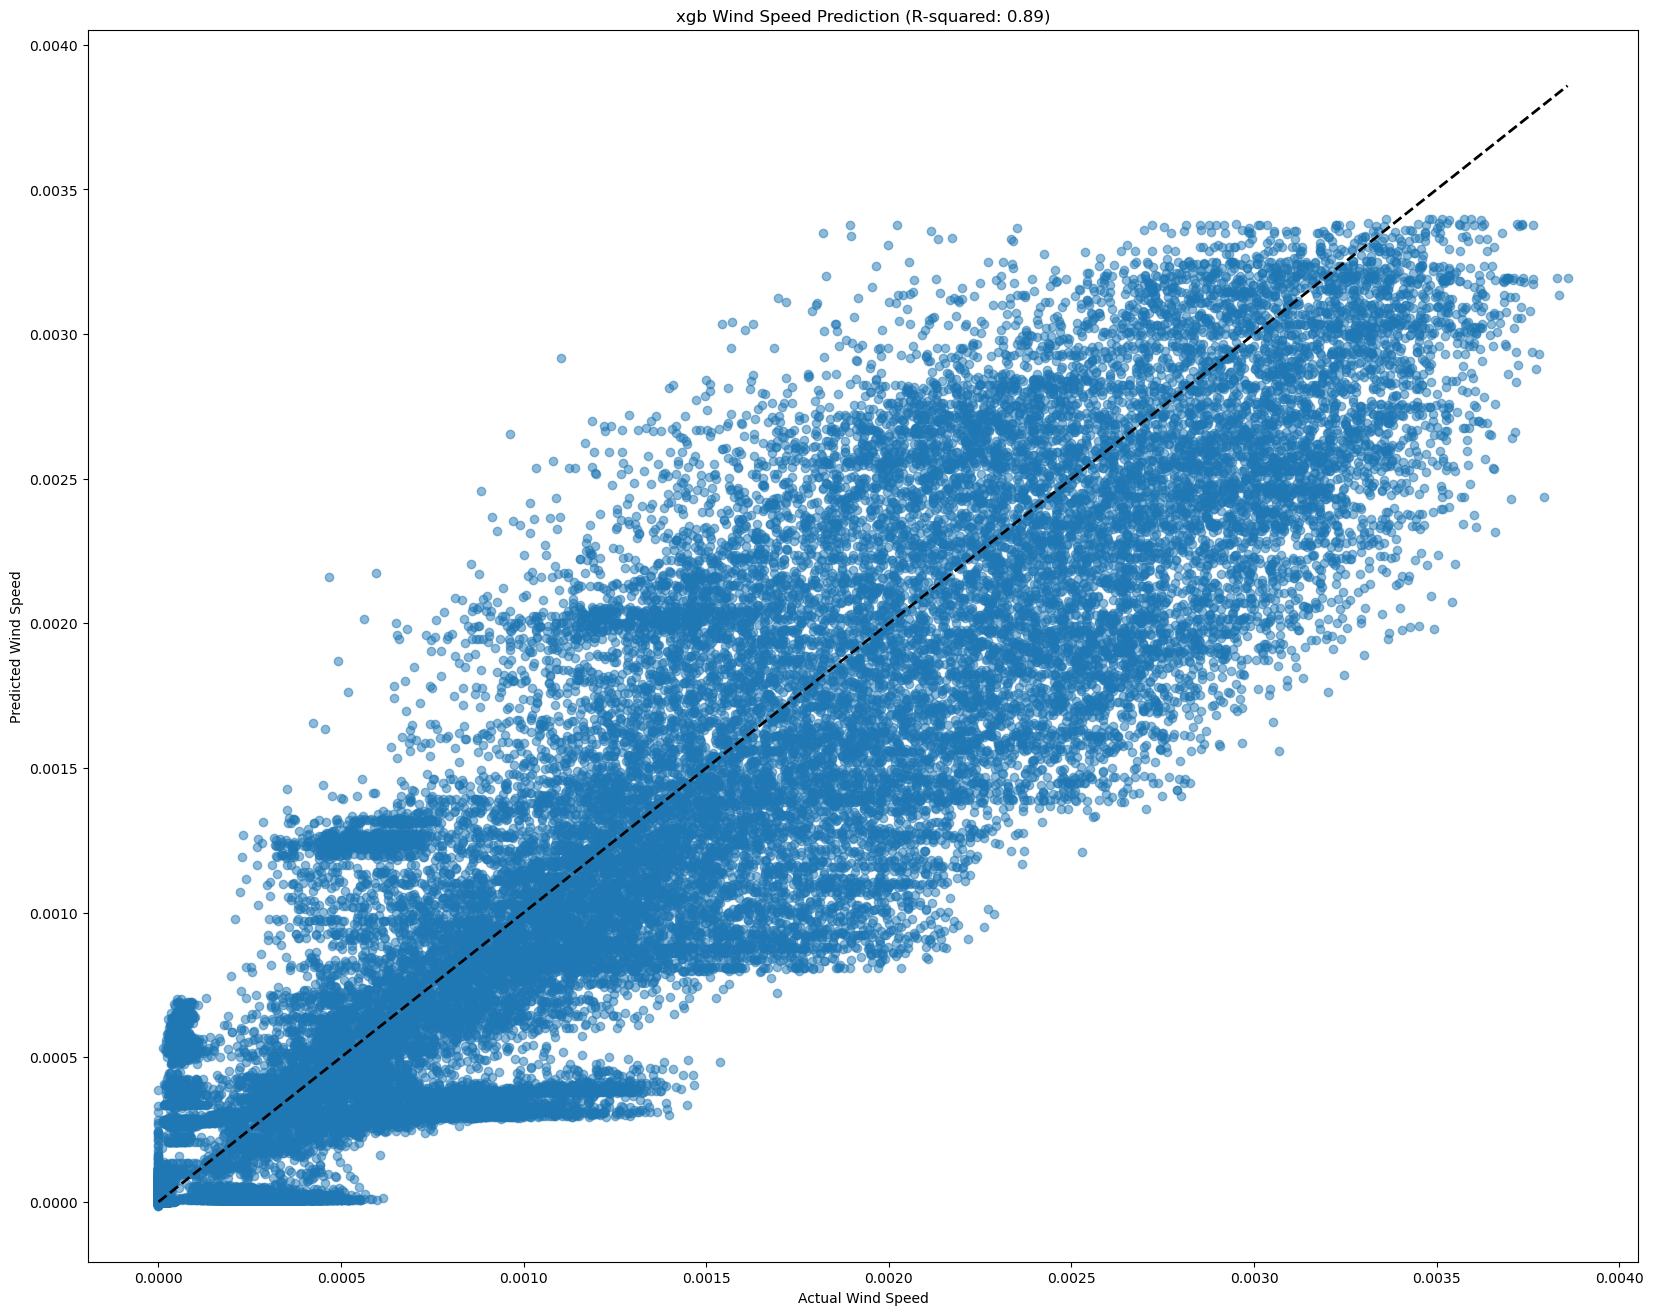

In [43]:
# Create the scatter plot
plt.figure(figsize=(20, 16))
plt.scatter(test_y, predictions_xgb, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title(f'xgb Wind Speed Prediction (R-squared: {r2:.2f})')
plt.show()

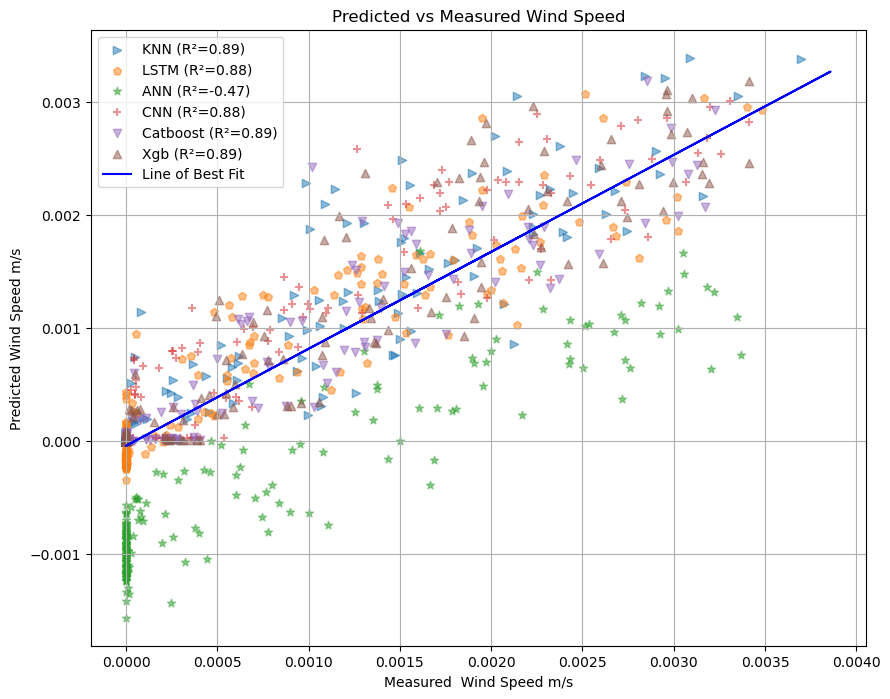

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to plot scatter plot for each model with different markers
def plot_predictions(test_y, predictions, model_name, marker, sample_size=200):
    # Randomly sample 200 points for plotting
    sample_indices = np.random.choice(len(test_y), size=sample_size, replace=False)
    test_y_sample = test_y[sample_indices].flatten()
    predictions_sample = predictions[sample_indices].flatten()

    # Calculate R^2 score
    r2 = r2_score(test_y, predictions)

    # Plot scatter plot with specific marker
    plt.scatter(test_y_sample, predictions_sample, label=f"{model_name} (R²={r2:.2f})", alpha=0.5, marker=marker)

# Define marker styles for different models
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'D', 'X', '+']

# Combine all predictions for a single line of best fit
all_predictions = np.concatenate([
    predictions_gbm.flatten(),
    # predictions_svm.flatten(),
    predictions_knn.flatten(),
    predictions_lstm.flatten(),
    predictions_ann.flatten(),
    predictions_dl.flatten(),
    predictions_cnn.flatten(),
    predictions_catboost.flatten(),
    predictions_xgb.flatten(),
])

# Flatten test_y to match the shape of all_predictions
test_y_flat = np.tile(test_y.flatten(), len(all_predictions) // len(test_y.flatten()))

# Calculate the line of best fit for all predictions
z = np.polyfit(test_y_flat, all_predictions, 1)
p = np.poly1d(z)

# Plot settings
plt.figure(figsize=(10, 8))

# Plot scatter plot for each model with different markers
# plot_predictions(test_y, predictions_gbm, 'Gradient Boosting', markers[3])
plot_predictions(test_y, predictions_knn, 'KNN', markers[4])
# plot_predictions(test_y, predictions_svm, 'SVM', markers[5])
plot_predictions(test_y, predictions_lstm, 'LSTM', markers[6])
plot_predictions(test_y, predictions_ann, 'ANN', markers[7])
# plot_predictions(test_y, predictions_dl, 'FNN', markers[8])
plot_predictions(test_y, predictions_cnn, 'CNN', markers[10])
plot_predictions(test_y, predictions_catboost, 'Catboost', markers[1])
plot_predictions(test_y, predictions_xgb, 'Xgb', markers[2])

# Plot line of best fit for all predictions in blue
plt.plot(test_y, p(test_y.flatten()), color='blue', label='Line of Best Fit')

# Plot settings
plt.xlabel('Measured  Wind Speed m/s')
plt.ylabel('Predicted Wind Speed m/s')
plt.title('Predicted vs Measured Wind Speed')
plt.legend()
plt.grid(True)
plt.show()